In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/flat-ui__data-Fri Apr 04 2025.csv",delimiter=',', encoding='ascii')
df

,Country,Country Code,Year,CPI
0,Afghanistan,AFG,2005,12.686269
1,Afghanistan,AFG,2006,6.784597
2,Afghanistan,AFG,2007,8.680571
3,Afghanistan,AFG,2008,26.418664
4,Afghanistan,AFG,2009,-6.811161
...,...,...,...,...
11034,Zimbabwe,ZWE,2018,10.618866
11035,Zimbabwe,ZWE,2019,255.304991
11036,Zimbabwe,ZWE,2020,557.201817
11037,Zimbabwe,ZWE,2021,98.546105


In [8]:
df.describe(include='all')

,Country,Country Code,Year,CPI
count,11039,11039,11039.000000,11039.000000
unique,240,240,NaN,NaN
top,Australia,AUS,NaN,NaN
freq,64,64,NaN,NaN
mean,NaN,NaN,1997.128725,19.825504
std,NaN,NaN,16.961565,288.054102
min,NaN,NaN,1960.000000,-17.640424
25%,NaN,NaN,1984.000000,2.409180
50%,NaN,NaN,1999.000000,4.944324
75%,NaN,NaN,2011.000000,9.702161


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11039 entries, 0 to 11038
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11039 non-null  object 
 1   Country Code  11039 non-null  object 
 2   Year          11039 non-null  int64  
 3   CPI           11039 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 345.1+ KB


(11039, 4)

In [10]:
# Check for missing values
print(df.isnull().sum())



Country         0
Country Code    0
Year            0
CPI             0
dtype: int64


In [11]:
# Remove any duplicate rows if present
df.drop_duplicates(inplace=True)



In [12]:
# Optionally, strip whitespace from string columns (if needed)
df['Country'] = df['Country'].str.strip()
df['Country Code'] = df['Country Code'].str.strip()

print('Dataset shape after cleaning:', df.shape)

Dataset shape after cleaning: (11039, 4)


Text(0.5, 1.0, 'Distribution of Years')

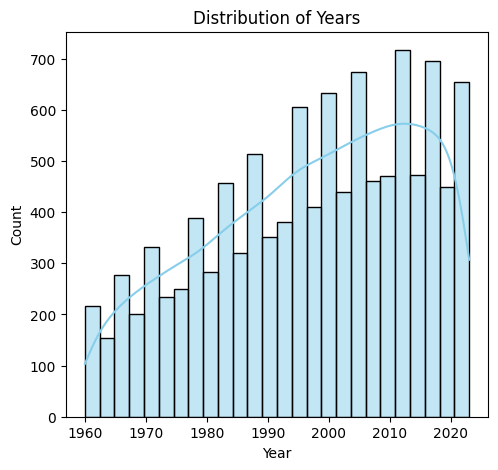

In [16]:
# Histograms for Year and CPI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Year'], kde=True, color='skyblue')
plt.title('Distribution of Years')



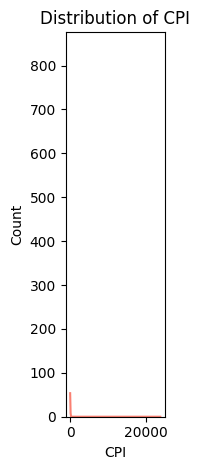

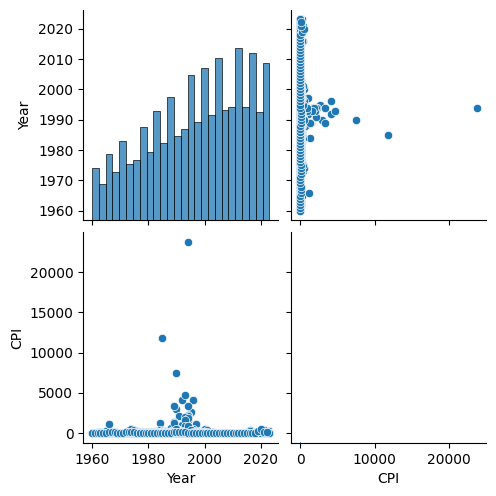

In [15]:
plt.subplot(1, 4, 4)
sns.histplot(df['CPI'], kde=True, color='salmon')
plt.title('Distribution of CPI')

plt.tight_layout()
plt.show()

# Pair Plot between Year and CPI
sns.pairplot(df[['Year', 'CPI']])
plt.show()

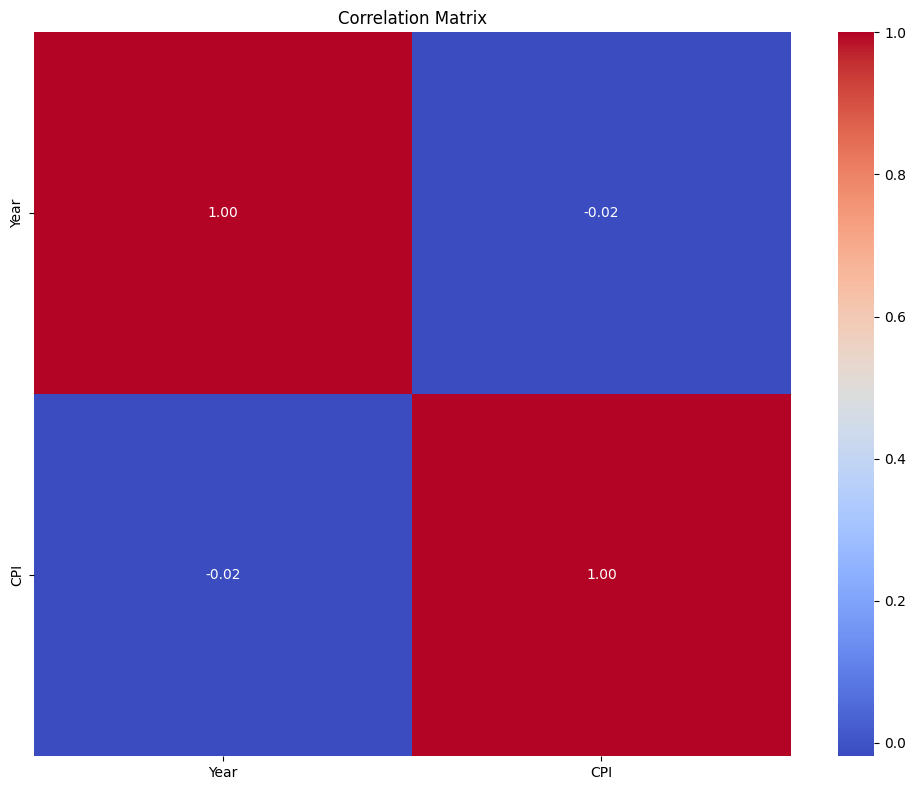

In [17]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

<ipython-input-20-810e38f2a2cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cpi, y='Country', x='CPI', palette='viridis')


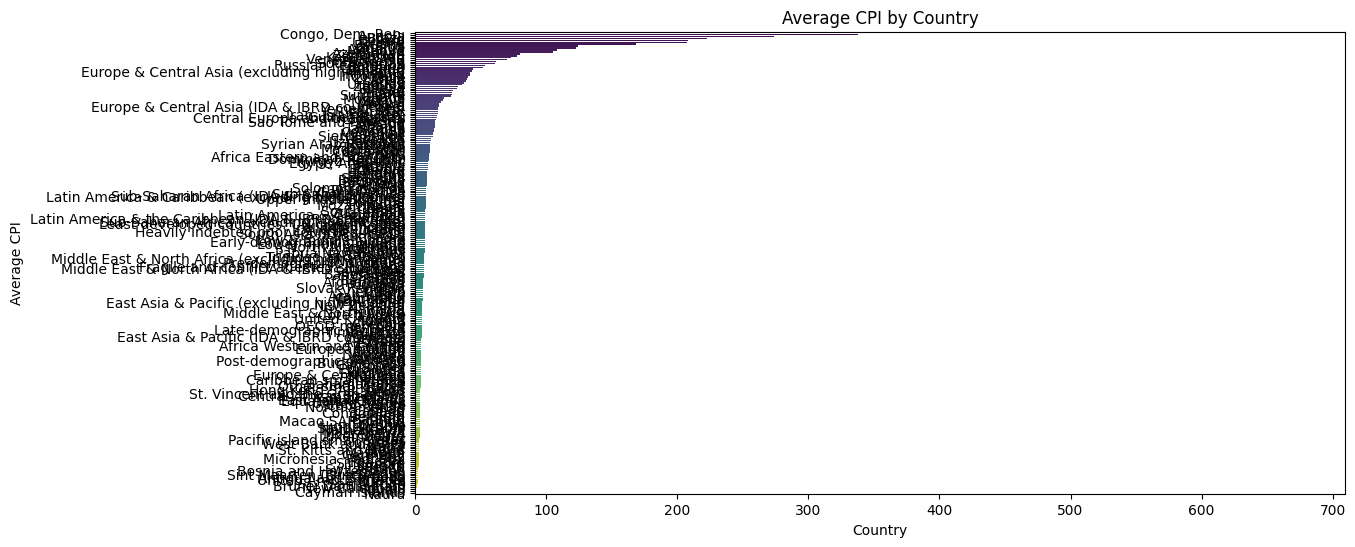

In [20]:
plt.figure(figsize=(12, 6))
avg_cpi = df.groupby('Country')['CPI'].mean().reset_index().sort_values('CPI', ascending=False)
sns.barplot(data=avg_cpi, y='Country', x='CPI', palette='viridis')
plt.title('Average CPI by Country')
plt.xlabel('Country')
plt.ylabel('Average CPI')
plt.show()



In [26]:
pip install plotly.express

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# For simplicity, predict CPI using Year
X = df[['Year']]
y = df['CPI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model with the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score of the model:', r2)

R-squared score of the model: 0.0006211104392043199
